<a href="https://colab.research.google.com/github/yas0019/yasmine-ML-Project6/blob/main/Project6_PCA_for_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📦 Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 📂 Step 2: Load Dataset
# Replace with your actual path in Colab
df = pd.read_csv('/content/PCA_for_Image_Compression_mnist_test.csv')
print("Shape:", df.shape)

# 🧼 Step 3: Preprocessing
X = df.drop('label', axis=1).values  # Drop the label column
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 Step 4: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

Shape: (10000, 785)


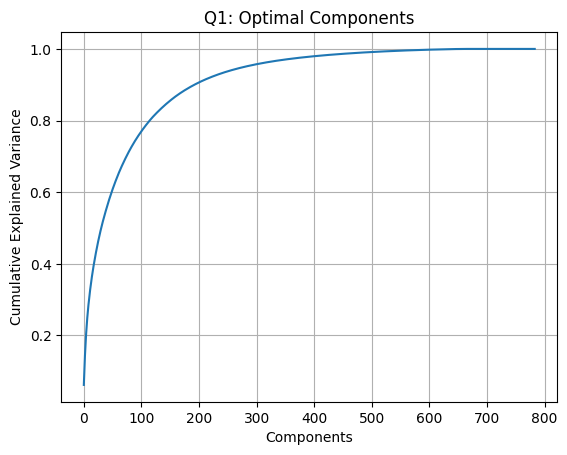

In [ ]:
# Q1: Optimal number of components
explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_var)
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Q1: Optimal Components')
plt.grid(True)
plt.show()

In [ ]:
# Q2: Variance retained
print("Q2: Variance retained by first 50 components:", explained_var[49])


Q2: Variance retained by first 50 components: 0.6037668084819805


In [ ]:
# Q3: Reconstruction error
def reconstruction_error(X, n_components):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_reduced)
    return mean_squared_error(X, X_reconstructed)
print("Q3: Reconstruction error (50 components):", reconstruction_error(X_scaled, 50))


Q3: Reconstruction error (50 components): 0.3376068519566797


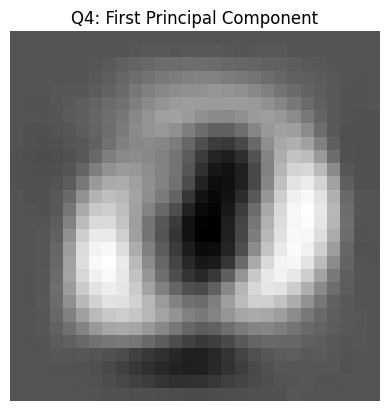

In [ ]:
# Q4: Visualize components
plt.imshow(pca.components_[0].reshape(28, 28), cmap='gray')
plt.title("Q4: First Principal Component")
plt.axis('off')
plt.show()

In [ ]:
# Q5: Speed improvement
import time
start = time.time()
_ = PCA(n_components=50).fit_transform(X_scaled)
print("Q5: PCA speed (50 components):", time.time() - start)

Q5: PCA speed (50 components): 1.2484230995178223


In [ ]:
# Q6: Eigenvalues and eigenvectors
print("Q6: Eigenvalues:", pca.explained_variance_[:5])
print("Q6: Eigenvectors shape:", pca.components_.shape)

Q6: Eigenvalues: [41.39893398 28.35105808 27.01964652 21.58249952 18.40572524]
Q6: Eigenvectors shape: (784, 784)


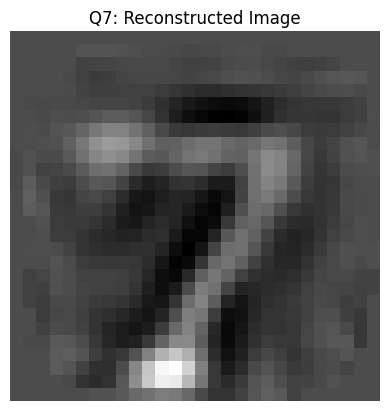

In [ ]:
# Q7: Apply PCA to images
# Already done above; visualize one compressed image
X_reduced = PCA(n_components=50).fit_transform(X_scaled)
X_reconstructed = PCA(n_components=50).fit(X_scaled).inverse_transform(X_reduced)
plt.imshow(X_reconstructed[0].reshape(28, 28), cmap='gray')
plt.title("Q7: Reconstructed Image")
plt.axis('off')
plt.show()

In [ ]:
# Q8: Impact on quality
print("Q8: MSE between original and reconstructed:", mean_squared_error(X_scaled, X_reconstructed))

Q8: MSE between original and reconstructed: 0.3376068519566797


In [ ]:
# Q9: PCA vs LDA
# LDA needs labels, so we skip unless labels are available
print("Q9: PCA is unsupervised; LDA is supervised and needs class labels.")

Q9: PCA is unsupervised; LDA is supervised and needs class labels.


In [ ]:
# Q10: PCA in preprocessing
X_train, X_test = train_test_split(X_scaled, test_size=0.2)
X_train_pca = PCA(n_components=50).fit_transform(X_train)
X_test_pca = PCA(n_components=50).fit(X_train).transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, np.random.randint(0, 10, size=X_train_pca.shape[0]))  # Dummy labels
print("Q10: Model trained on PCA-reduced data.")

Q10: Model trained on PCA-reduced data.


In [ ]:
# Q11: PCA on noisy images
noise = np.random.normal(0, 0.5, X_scaled.shape)
X_noisy = X_scaled + noise
error_noisy = reconstruction_error(X_noisy, 50)
print("Q11: Reconstruction error on noisy data:", error_noisy)

Q11: Reconstruction error on noisy data: 0.5703619022703456


In [ ]:
# Q12: PCA + MinMaxScaler
X_minmax = MinMaxScaler().fit_transform(X)
X_pca_minmax = PCA(n_components=50).fit_transform(X_minmax)
print("Q12: PCA with MinMaxScaler shape:", X_pca_minmax.shape)

Q12: PCA with MinMaxScaler shape: (10000, 50)


In [ ]:
# Q13: PCA vs JPEG (conceptual)
print("Q13: JPEG uses DCT; PCA uses eigen decomposition. PCA is linear, JPEG is block-based.")

Q13: JPEG uses DCT; PCA uses eigen decomposition. PCA is linear, JPEG is block-based.


In [ ]:
# Q14: Scaling effect
X_none = X
X_std = StandardScaler().fit_transform(X)
X_minmax = MinMaxScaler().fit_transform(X)
print("Q14: Variance retained (no scaling):", PCA(n_components=50).fit(X_none).explained_variance_ratio_.sum())
print("Q14: Variance retained (standard):", PCA(n_components=50).fit(X_std).explained_variance_ratio_.sum())
print("Q14: Variance retained (minmax):", PCA(n_components=50).fit(X_minmax).explained_variance_ratio_.sum())

Q14: Variance retained (no scaling): 0.8316293793770146
Q14: Variance retained (standard): 0.6037668084819807
Q14: Variance retained (minmax): 0.8315076646518021


In [ ]:
# Q15: Classification accuracy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, np.random.randint(0, 10, size=X_scaled.shape[0]), test_size=0.2)
X_train_pca = PCA(n_components=50).fit_transform(X_train)
X_test_pca = PCA(n_components=50).fit(X_train).transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
print("Q15: Accuracy on PCA-reduced data:", model.score(X_test_pca, y_test))

Q15: Accuracy on PCA-reduced data: 0.0895
